In [34]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
from evaluate import evaluate

In [35]:
def view_component(reconstruction_path, ground_truth_path,
                   component_name, component_id,
                   num_components, num_frames):
    
    results = evaluate(reconstruction_path, 
                       ground_truth_path,
                       num_components,
                       num_frames)
    matches = results["matched_pairs"]
    id1, id2 = matches[component_id]
    ground_truth_component = zarr.load(f"{ground_truth_path}/{component_name}s/{component_name}{id1}.zarr")
    reconstructed_component = zarr.load(f"{reconstruction_path}/{component_name}s/{component_name}{id2}.zarr")

    component_error = results["component_errors"][component_id]
    total_error = results[f"total_{component_name}_reconstruction_error"]
    
    figure, axis = plt.subplots(1, 2)
    
    if component_name == "component":
        axis[0].imshow(ground_truth_component, cmap=plt.cm.bone)
        axis[0].set_title(f"ground truth component {component_id}", fontsize=12)
        axis[1].imshow(reconstructed_component, cmap=plt.cm.bone)
        axis[1].set_title(f"reconstructed component {component_id}")
    
    elif component_name == "trace":
        axis[0].plot(ground_truth_component)
        axis[0].set_title(f"ground truth component {component_id}")
        axis[1].plot(reconstructed_component)
        axis[1].set_title(f"reconstructed component {component_id}")

In [36]:
reconstruction_path = "reconstruction"
ground_truth_path = "ground_truth"
num_components = 11
num_frames = 100

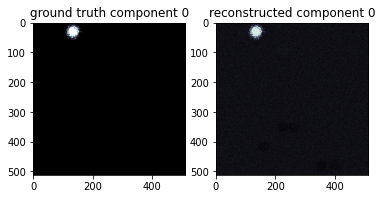

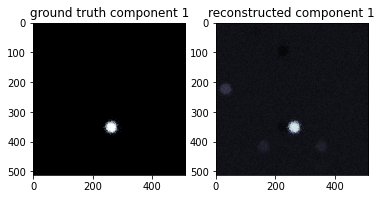

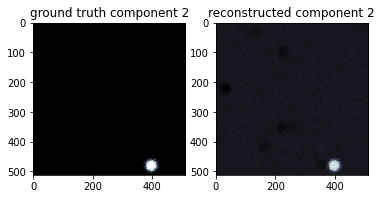

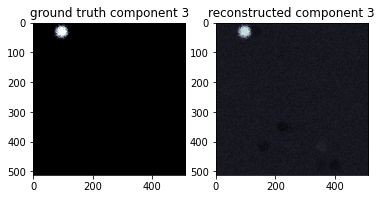

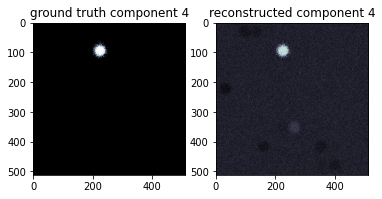

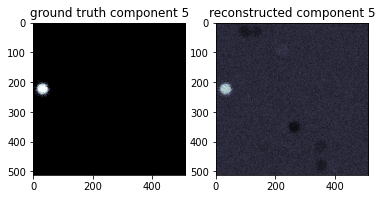

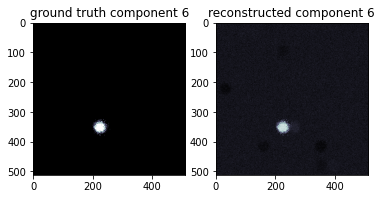

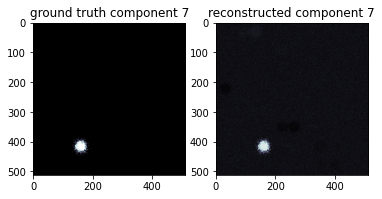

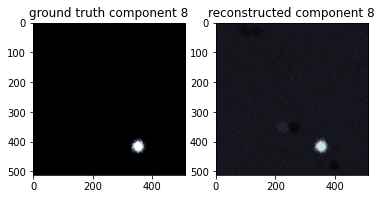

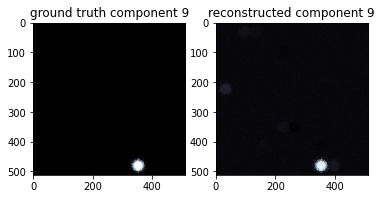

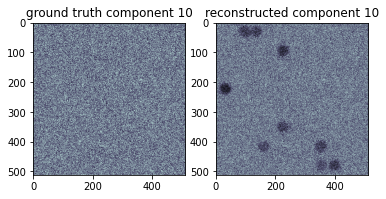

In [30]:
for component_id in range(num_components):
    view_component(reconstruction_path,
                  ground_truth_path,
                  "component", 
                  component_id,
                  num_components,
                  num_frames)


ValueError: x, y, and format string must not be None

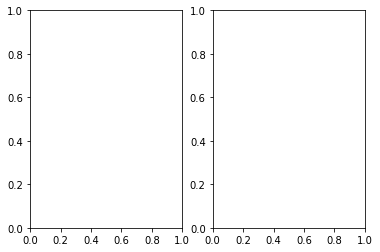

In [38]:
for i in range(num_components-1):
    component_error, total_error = view_component(reconstruction_path,
                                                  ground_truth_path,
                                                  "trace", 
                                                  component_id,
                                                  num_components,
                                                  num_frames)